In [1]:
import folium 
import requests 
import json 
from IPython.display import display 
# URL untuk data JSON 
url = 'https://raw.githubusercontent.com/pythonvisualization/folium/master/examples/data/antarctic_ice_edge.json' 

In [2]:
pip install folium

  Using cached folium-0.20.0-py2.py3-none-any.whl.metadata (4.2 kB)
  Using cached branca-0.8.2-py3-none-any.whl.metadata (1.7 kB)
Using cached folium-0.20.0-py2.py3-none-any.whl (113 kB)
Using cached branca-0.8.2-py3-none-any.whl (26 kB)

   -------------------- ------------------- 1/2 [folium]
   ---------------------------------------- 2/2 [folium]

Note: you may need to restart the kernel to use updated packages.


In [7]:
import plotly.tools as tls 

In [11]:
global_temp_country = pd.read_csv('C:/00_YASIN MANIK HAWA/GlobalLandTemperaturesByCountry.csv')
global_temp_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [12]:
global_temp_country.shape 

(577462, 4)

In [15]:
!pip install plotly

In [17]:
import plotly
plotly.__version__

'5.19.0'

In [19]:
global_temp_country = pd.read_csv('C:/00_YASIN MANIK HAWA/GlobalLandTemperaturesByCountry.csv')
global_temp_country.isna().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [20]:
pd.set_option('display.max_rows',243) 
global_temp_country.groupby(['Country'])['AverageTemperature'].mean()

Country
Afghanistan                                  14.045007
Africa                                       24.074203
Albania                                      12.610646
Algeria                                      22.985112
American Samoa                               26.611965
Andorra                                      11.201553
Angola                                       21.824549
Anguilla                                     26.610492
Antarctica                                         NaN
Antigua And Barbuda                          26.437924
Argentina                                    14.621194
Armenia                                       8.551648
Aruba                                        27.920390
Asia                                          7.347892
Australia                                    21.624697
Austria                                       6.210732
Azerbaijan                                   11.175936
Bahamas                                      25.128220
Ba

In [21]:
global_temp_country['Country'].unique() 

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

In [22]:
dict={'Denmark (Europe)':'Denmark', 
      'France (Europe)':'France', 
      'Netherlands (Europe)':'Netherlands', 
      'United Kingdom (Europe)':'United Kingdom', 
     'Congo (Democratic Republic Of The)':'Congo'} 

In [23]:
global_temp_country['Country']=global_temp_country['Country'].replace(dict) 

In [24]:
global_temp_country['Country'].nunique()

238

In [25]:
pd.set_option('display.max_rows',243) 
avg_temp=global_temp_country.groupby(['Country'])['AverageTemperature'
 ].mean().to_frame().reset_index() 
avg_temp.head() 

,Country,AverageTemperature
0,Afghanistan,14.045007
1,Africa,24.074203
2,Albania,12.610646
3,Algeria,22.985112
4,American Samoa,26.611965


In [28]:
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
init_notebook_mode(connected = True)

In [27]:
pip install chart-studio


   ---------------------------------------- 2/2 [chart-studio]

Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install plotly.express

Note: you may need to restart the kernel to use updated packages.


In [30]:
import plotly.express as px 
import chart_studio.plotly as py 
import plotly.graph_objs as go 
import pandas as pd 
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot 
init_notebook_mode(connected = True) 

In [31]:
import plotly.express as px 
import chart_studio.plotly as py 
import plotly.graph_objs as go 
import pandas as pd 
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot 
init_notebook_mode(connected = True) 

In [33]:
fig = px.choropleth(avg_temp,locations='Country',locationmode='country names',color='AverageTemperature')
fig.update_layout(title='Choropleth Map of AverageTemperature',template='plotly_dark')
fig.show()

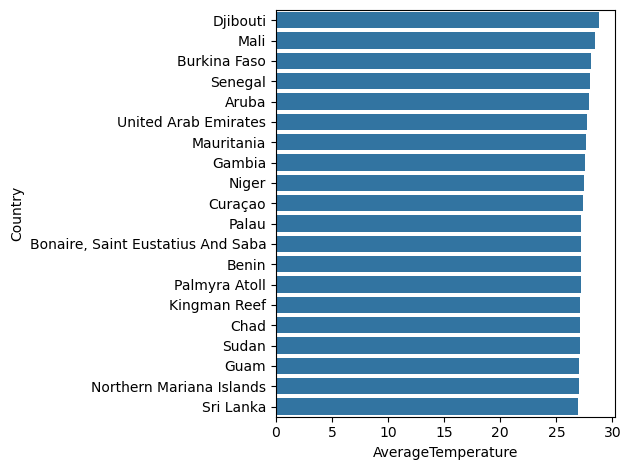

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure avg_temp exists. If not, try to build it from global_temp_country,
# and if that doesn't exist, read the CSV (only import pandas if needed).
if 'avg_temp' not in globals():
	if 'global_temp_country' not in globals():
		if 'pd' not in globals():
			import pandas as pd
		global_temp_country = pd.read_csv('C:/00_YASIN MANIK HAWA/GlobalLandTemperaturesByCountry.csv')
	avg_temp = global_temp_country.groupby(['Country'])['AverageTemperature'].mean().to_frame().reset_index()

top20 = avg_temp.sort_values(by='AverageTemperature', ascending=False).head(20)
sns.barplot(x='AverageTemperature', y='Country', data=top20)
plt.tight_layout()
plt.show()

In [12]:
global_temp = pd.read_csv("C:/00_YASIN MANIK HAWA/GlobalTemperatures.csv") 
global_temp.head() 

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
global_temp['dt'][0].split('-')[0] 

'1750'

In [14]:
def fetch_year(date): 
    return date.split('-')[0] 

In [15]:
global_temp['years']=global_temp['dt'].apply(fetch_year) 

In [16]:
global_temp.groupby('years').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'}) 

,LandAverageTemperature,LandAverageTemperatureUncertainty
years,,
1750,8.719364,2.637818
1751,7.976143,2.781143
1752,5.779833,2.977000
1753,8.388083,3.176000
1754,8.469333,3.494250
...,...,...
2011,9.516000,0.082000
2012,9.507333,0.083417
2013,9.606500,0.097667


In [17]:
data=global_temp.groupby('years').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'}).reset_index() 
data.head() 


,years,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,8.719364,2.637818
1,1751,7.976143,2.781143
2,1752,5.779833,2.977000
3,1753,8.388083,3.176000
4,1754,8.469333,3.494250


In [18]:
data['Uncertainty top']=data['LandAverageTemperature']+data['LandAverageTemperatureUncertainty'] 
data['Uncertainty bottom']=data['LandAverageTemperature']- data['LandAverageTemperatureUncertainty'] 
data.head() 

,years,LandAverageTemperature,LandAverageTemperatureUncertainty,Uncertainty top,Uncertainty bottom
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000
2,1752,5.779833,2.977000,8.756833,2.802833
3,1753,8.388083,3.176000,11.564083,5.212083
4,1754,8.469333,3.494250,11.963583,4.975083


In [20]:
import plotly.express as px 
fig=px.line(data,x="years",y=["Uncertainty top","Uncertainty bottom","LandAverageTemperature"],title="Average Land Temperature in World",template="plotly_dark") 
fig.show() 


In [3]:
import pandas as pd 
global_temp_state = pd.read_csv('C:/00_YASIN MANIK HAWA/GlobalLandTemperaturesByState.csv')
global_temp_state.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [4]:
USA=global_temp_state[global_temp_state['Country']=='United States'] 
USA.dropna(inplace=True) 
USA['State'].unique() 

C:\Users\ucinu\AppData\Local\Temp\ipykernel_164256\3128588901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USA.dropna(inplace=True)


array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District Of Columbia',
       'Florida', 'Georgia (State)', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [5]:
state={'Georgia (State)':'Georgia','District Of Columbia':'Columbia'} 
USA['State'].replace(state,inplace=True)
USA=USA[['AverageTemperature','State']] 
USA_temp=USA.groupby('State')['AverageTemperature'].mean().reset_index() 
USA_temp.head() 

C:\Users\ucinu\AppData\Local\Temp\ipykernel_164256\3069218576.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  USA['State'].replace(state,inplace=True)
C:\Users\ucinu\AppData\Local\Temp\ipykernel_164256\3069218576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USA['State'].replace(state,inplace=True)


,State,AverageTemperature
0,Alabama,17.066138
1,Alaska,-4.890738
2,Arizona,15.381526
3,Arkansas,15.573963
4,California,14.327677


In [6]:
USA_temp.shape 

(51, 2)

In [8]:
%pip install opencage
from opencage.geocoder import OpenCageGeocode 


   -------------------- ------------------- 1/2 [opencage]
   ---------------------------------------- 2/2 [opencage]

Note: you may need to restart the kernel to use updated packages.


In [10]:
key = '5ca89e8267cb476a88cd247f5d0dc35d'  # get api key from:  https://opencagedata.com/api
geocoder = OpenCageGeocode(key) 
query = 'Bijuesca, Spain'   
results = geocoder.geocode(query) 
print (results)

[{'annotations': {'DMS': {'lat': "41° 32' 25.32660'' N", 'lng': "1° 55' 14.18088'' W"}, 'MGRS': '30TWL9003399308', 'Maidenhead': 'IN91am99mq', 'Mercator': {'x': -213800.86, 'y': 5064032.916}, 'NUTS': {'NUTS0': {'code': 'ES'}, 'NUTS1': {'code': 'ES2'}, 'NUTS2': {'code': 'ES24'}, 'NUTS3': {'code': 'ES243'}}, 'OSM': {'edit_url': 'https://www.openstreetmap.org/edit?relation=342295#map=17/41.54037/-1.92061', 'note_url': 'https://www.openstreetmap.org/note/new#map=17/41.54037/-1.92061&layers=N', 'url': 'https://www.openstreetmap.org/?mlat=41.54037&mlon=-1.92061#map=17/41.54037/-1.92061'}, 'UN_M49': {'regions': {'ES': '724', 'EUROPE': '150', 'SOUTHERN_EUROPE': '039', 'WORLD': '001'}, 'statistical_groupings': ['MEDC']}, 'callingcode': 34, 'currency': {'alternate_symbols': [], 'decimal_mark': ',', 'html_entity': '€', 'iso_code': 'EUR', 'iso_numeric': '978', 'name': 'Euro', 'smallest_denomination': 1, 'subunit': 'Cent', 'subunit_to_unit': 100, 'symbol': '€', 'symbol_first': 0, 'thousands_separat

In [11]:
lat = results[0]['geometry']['lat'] 
lon = results[0]['geometry']['lng'] 
print (lat, lon)

41.5403685 -1.9206058


In [12]:
list_lat=[] 
list_long=[] 
for state in USA_temp['State']: # iterate over rows in dataframe 
    results = geocoder.geocode(state)    
    lat = results[0]['geometry']['lat'] 
    lon = results[0]['geometry']['lng'] 
 
    list_lat.append(lat) 
    list_long.append(lon) 


In [13]:
#create new colomns
USA_temp['lat'] = list_lat    
USA_temp['lon'] = list_long 

In [15]:
USA_temp.head()

,State,AverageTemperature,lat,lon
0,Alabama,17.066138,33.258882,-86.829534
1,Alaska,-4.890738,64.445961,-149.680909
2,Arizona,15.381526,34.395342,-111.763275
3,Arkansas,15.573963,35.204888,-92.447911
4,California,14.327677,36.701463,-118.755997


In [18]:
import folium 
from folium.plugins import HeatMap 
basemap=folium.Map() 

In [25]:
HeatMap(USA_temp[['lat','lon','AverageTemperature']],zoom=20,radius=15).add_to(basemap)
basemap


In [26]:
pip install jupyter ipywidgets folium ipyleaflet geopandas



  Using cached geopandas-1.1.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached pyogrio-0.11.1-cp313-cp313-win_amd64.whl.metadata (5.4 kB)
  Using cached pyproj-3.7.2-cp313-cp313-win_amd64.whl.metadata (31 kB)
  Using cached shapely-2.1.2-cp313-cp313-win_amd64.whl.metadata (7.1 kB)
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.1 MB ? eta -:--:--
   ------------------ --------------------- 0.5/1.1 MB 1.9 MB/s eta 0:00:01
   ------------------------------------- -- 1.0/1.1 MB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 1.8 MB/s eta 0:00:00
Using cached geopandas-1.1.1-py3-none-any.whl (338 kB)
Using cached pyogrio-0.11.1-cp313-cp313-win_amd64.whl (19.2 MB)
Using cached pyproj-3.7.2-cp313-cp313-win_amd64.whl (6.3 MB)
Using cached shapely-2.1.2-cp313-cp313-win_amd64.whl (1.7 MB)

   ---------- -----------------------------  3/11 [shapely]
   ---------- -----------------------------  3